# Tarea opcional/extra

##### Statistical Learning II
##### Gustavo Alvarado
##### Carnet # 20063401 

In [2]:
import numpy as np
import pandas as pd
import io
import math
import matplotlib.pyplot as plt

## Función XOR

In [3]:
#Definiendo X y Y para la función XOR

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

In [7]:
#Función de activación
def sigmoid(X):
  return 1 / (1 + np.exp(-X))

In [4]:
#Derivada de la función de activación
def derivateSigmoid(X):
  return X * (1 - X)

In [8]:
#Función de entrenamiento

def MLPTraining(X, Y, lr, EPOCHS):

  h_Weight = np.random.uniform(size = (2, 2))
  Y_Weight = np.random.uniform(size = (2, 1))

  h_Bias = np.random.uniform(size = (1, 2))
  Y_Bias = np.random.uniform(size = (1, 1))

  loss = 0

  for epoch in range(EPOCHS): 

    #wX + b
    h = np.dot(X, h_Weight) + h_Bias
    h_Output = sigmoid(h)
    
    Y_Output = np.dot(h_Output, Y_Weight) + Y_Bias
    Y_Estimated = sigmoid(Y_Output)

    #Calcuando MSE del error cuadrado
    loss = 0.5 * (Y - Y_Estimated) ** 2
    error = Y - Y_Estimated

    #Calculando gradientes
    h_Gradient = np.matmul(X.T, ((error * derivateSigmoid(Y_Estimated)) * Y_Weight.T) * derivateSigmoid(h_Output))
    Y_Gradient = np.matmul(h_Output.T, error * derivateSigmoid(Y_Estimated))

    #Actualizando weights
    h_Weight += lr * h_Gradient
    Y_Weight += lr * Y_Gradient 

    #Actualizando biases
    h_Bias += np.sum(lr * ((error * derivateSigmoid(Y_Estimated)) * Y_Weight.T) * derivateSigmoid(h_Output), axis = 0)
    Y_Bias += np.sum(lr * error * derivateSigmoid(Y_Estimated), axis = 0)

    if epoch % 5000 == 0:
      print('Epoch', epoch, 'Loss:', np.sum(loss))

  return h_Output, h_Weight, h_Bias, Y_Weight, Y_Bias 


In [9]:
h_Output, h_Weight, h_Bias, Y_Weight, Y_Bias = MLPTraining(X, Y, 0.7, 100000)

Epoch 0 Loss: 0.6985682031231238
Epoch 5000 Loss: 0.0008944974941952612
Epoch 10000 Loss: 0.0004015350582868192
Epoch 15000 Loss: 0.0002568676719418858
Epoch 20000 Loss: 0.00018827058527494796
Epoch 25000 Loss: 0.00014836155973539495
Epoch 30000 Loss: 0.00012230067206336329
Epoch 35000 Loss: 0.0001039648633245637
Epoch 40000 Loss: 9.037213957877079e-05
Epoch 45000 Loss: 7.989806894946003e-05
Epoch 50000 Loss: 7.158287683096132e-05
Epoch 55000 Loss: 6.482336898418556e-05
Epoch 60000 Loss: 5.922156613466253e-05
Epoch 65000 Loss: 5.4504358821073256e-05
Epoch 70000 Loss: 5.047814389337275e-05
Epoch 75000 Loss: 4.700188411588585e-05
Epoch 80000 Loss: 4.39704194614854e-05
Epoch 85000 Loss: 4.130375248437248e-05
Epoch 90000 Loss: 3.893995450734503e-05
Epoch 95000 Loss: 3.683034192871154e-05


In [10]:
h_Weight

array([[7.22314372, 5.44549811],
       [7.23005789, 5.44729113]])

In [11]:
h_Bias

array([[-3.30302098, -8.33985555]])

In [12]:
Y_Weight

array([[ 12.2234047 ],
       [-12.87840904]])

In [13]:
Y_Bias

array([[-5.78386101]])

In [14]:
#Función para clasificación

def classify(point, h_Weight, h_Bias, Y_Weight, Y_Bias): 

  h = np.dot(point, h_Weight) + h_Bias
  h_Output = sigmoid(h)
    
  Y_Output = np.dot(h_Output, Y_Weight) + Y_Bias
  Y_Estimated = sigmoid(Y_Output)

  if (Y_Estimated) >= 0.5:
    return 1
  else:
    return 0

In [15]:
classify([0, 0], h_Weight, h_Bias, Y_Weight, Y_Bias)

0

In [16]:
classify([0, 1], h_Weight, h_Bias, Y_Weight, Y_Bias)

1

In [17]:
classify([1, 0], h_Weight, h_Bias, Y_Weight, Y_Bias)

1

In [18]:
classify([1, 1], h_Weight, h_Bias, Y_Weight, Y_Bias)

0

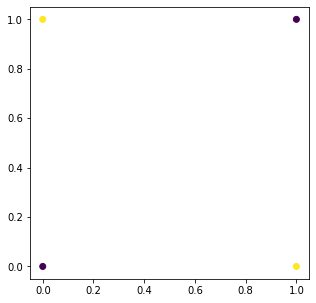

In [19]:
#Graficando datos de entrenamiento

plt.figure(figsize = (5, 5))
plt.scatter(X[:,0], X[:,1,], c = Y)

plt.show()

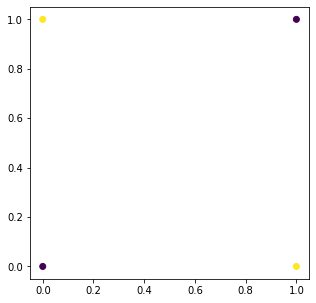

In [20]:
#Graficando el modelo entrenado

Y_Prediction = np.array(
    [
        [classify([0, 0], h_Weight, h_Bias, Y_Weight, Y_Bias)],
        [classify([0, 1], h_Weight, h_Bias, Y_Weight, Y_Bias)],
        [classify([1, 0], h_Weight, h_Bias, Y_Weight, Y_Bias)],
        [classify([1, 1], h_Weight, h_Bias, Y_Weight, Y_Bias)]
    ])

plt.figure(figsize = (5, 5))
plt.scatter(X[:,0], X[:,1,], c = Y_Prediction)

plt.show()